<a href="https://colab.research.google.com/github/deschena/networks_ml_epfl/blob/main/nml23_assignment1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [NML23] Assignment 1B: Network Models

TAs: [Ortal Senouf](https://people.epfl.ch/ortal.senouf) and [William Cappelletti](https://people.epfl.ch/william.cappelletti)

## Students

* Team: `1`
* Students: `Yixuan Xu`, `Justin Deschenaux`

## Rules

> ⚠️ **Read carefully before starting**

**Deadline:** March 28th

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 25% of the overall assignments score.
* The total number of points for part B is **52**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

**Expected output:**

You will have coding and theoretical questions. Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
Anything outside shall not be touched, except if otherwise stated.

Theoretical questions shall be answered in the following markdown cell. The first line will be 
> **Your answer here:**

**Submission:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first except for the Question 4 of Section 1 (at the indicated portion only).

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

## Objective

The purpose of this assignment is to explore a given dataset, represent it by network by constructing different graphs. In the first section, you analyzed various network properties. In this second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

In [1]:
# !pip install networkx==3.0 -q
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug' -O data_1b.pickle

--2023-03-28 12:45:04--  https://docs.google.com/uc?export=download&id=1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug
Resolving docs.google.com (docs.google.com)... 142.251.143.206
Connecting to docs.google.com (docs.google.com)|142.251.143.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m0jfunf6u3l4d03i9gt8jldlu6ekmt4l/1680000300000/09510815484399706520/*/1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug?e=download&uuid=720e4075-7aee-4585-a320-f5c0eb33c3f5 [following]
--2023-03-28 12:45:05--  https://doc-14-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m0jfunf6u3l4d03i9gt8jldlu6ekmt4l/1680000300000/09510815484399706520/*/1Ze-vDx_cMr7iNkivv8LLhniEtp4RD1ug?e=download&uuid=720e4075-7aee-4585-a320-f5c0eb33c3f5
Resolving doc-14-9o-docs.googleusercontent.com (doc-14-9o-docs.googleusercontent.com)... 142.251.143.129
Connecting to doc-14-9o-docs.googleuserconten

In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

with open("data_1b.pickle", "rb") as f:
    data_1b = pickle.load(f)
f.close()
A_citation = data_1b['cit_graph']
A_feature_pruned = data_1b['feat_graph']

In [3]:
np.array_equal(A_citation, A_citation.T)

True

## Section B: Network Models

In this section, you will analyze the feature and citation graphs you constructed in the previous section in terms of the network model types.
For this purpose, you can use the NetworkX libary imported below. **Notice** that the citation and features adjency matrices were given to you in the previous code block.  

In [4]:
import networkx as nx
import random

# Reproducibility
random.seed(42) # for networkx
np.random.seed(42) # for numpy

The next cell creates NetworkX graph objects from the adjacency matrices computed in the previous section. 

In [5]:
G_citation = nx.from_numpy_array(A_citation)
print('Number of nodes: {}, Number of edges: {}'. format(G_citation.number_of_nodes(), G_citation.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(G_citation), nx.number_connected_components(G_citation)))

Number of nodes: 418, Number of edges: 827
Number of self-loops: 0, Number of connected components: 16


In the rest of this assignment, we will consider the pruned feature graph as the feature network.

In [6]:
G_feature = nx.from_numpy_array(A_feature_pruned)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(G_feature), nx.number_connected_components(G_feature)))

Number of nodes: 418, Number of edges: 2364
Number of self-loops: 0, Number of connected components: 324


### Question 5 [8pt]: Simulation with the Erdős–Rényi (ER) random model

Create an ER graph using NetworkX to simulate the citation graph and the feature graph you have. When choosing parameters for the networks, take into account the number of vertices and edges of the original networks.

The number of nodes should exactly match the number of nodes in the original citation and feature graphs.

In [7]:
assert len(G_citation.nodes()) == len(G_feature.nodes())
n = len(G_citation.nodes())
n

418

We pick the number of links as the average of the number of edges in the citation and the feature graph.

In [8]:
m = np.round((G_citation.size() + G_feature.size()) / 2)
m

1596.0

**5.1 [2pt]** Explain how to determine the probability parameter for the Erdős–Rényi graph and crate a sample graph with NetworkX

**Your answer here:** Each edge in an Erdős–Rényi graph is sampled independently from the others with a probability $p$. Therefore, the expected number of edges is $\frac{n(n - 1)p}{2}$. In order to obtain a similar number of edges as the original graph, we pick $p = \frac{2 m}{n (n-1)}$

In [9]:
# Your solution here ###########################################################
# n is already defined
p = 2 * m / n / (n - 1)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_er = nx.erdos_renyi_graph(n, p, seed=1)

Check the number of edges in the Erdős–Rényi graph.

In [10]:
print('My Erdos-Rényi network that simulates the citation graph has {} edges.'.format(G_er.size()))

My Erdos-Rényi network that simulates the citation graph has 1634 edges.


**5.2 [2pt]** Check the size of the largest connected component in the citation, feature, and Erdős–Rényi graphs.

In [11]:
# Your solution here ###########################################################

def extract_largest_cc(G):
  '''Create a subgraph for the largest connected component'''
  
  largest_cc = max(nx.connected_components(G), key=len)
  return G.subgraph(largest_cc)

giant_citation = extract_largest_cc(G_citation)

giant_feature = extract_largest_cc(G_feature)

giant_er = extract_largest_cc(G_er)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print('The giant component of the citation graph has {} nodes and {} edges.'.format(giant_citation.number_of_nodes(), giant_citation.size()))
print('The giant component of the Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er.number_of_nodes(), giant_er.size()))
print('The giant component of the feature graph has {} nodes and {} edges.'.format(giant_feature.number_of_nodes(), giant_feature.size()))

The giant component of the citation graph has 395 nodes and 818 edges.
The giant component of the Erdos-Rényi network has 417 nodes and 1634 edges.
The giant component of the feature graph has 82 nodes and 2351 edges.


**5.3 [2pt]** Simulate a new Erdős–Rényi network to match the number of nodes in the giant component of the feature graph.
Explain how to choose the probability parameter in this setting.

*Hint:* Recall the expected giant component size from the lectures.

**Your answer here:** 

The size of the giant component of an Erdős–Rényi graph depends on the average degree of a node $\langle k \rangle = p (n - 1)$. We use the empirical graph to compute $\langle k \rangle$, needed to compute $p_\mathrm{new}$. We want to generate a graph with a similar fraction of nodes in the giant component. Recalling that $S = 1 - e^{- \langle k \rangle S} \Leftrightarrow \langle k \rangle = - \frac{\log(1 - S)}{S}$

In [12]:
# Your solution here ###########################################################
S_feature = giant_feature.number_of_nodes() / n
n_new = n 
p_new = -np.log(1 - S_feature) / S_feature / (n - 1)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

G_er_new = nx.erdos_renyi_graph(n_new, p_new)

Check the size of the new Erdős–Rényi network and its giant component.

In [13]:
print('My new Erdos Renyi network that simulates the feature graph has {} edges.'.format(G_er_new.size()))

giant_er_new = extract_largest_cc(G_er_new)
# Print fraction of nodes in er graph giant component
new_er_giant = extract_largest_cc(giant_er_new)
print('The giant component of the new Erdos-Rényi network has {} nodes and {} edges.'.format(giant_er_new.number_of_nodes(), giant_er_new.size()))

My new Erdos Renyi network that simulates the feature graph has 222 edges.
The giant component of the new Erdos-Rényi network has 105 nodes and 106 edges.


**5.4 [2 pt]** Is the new ER graph a good fit for the feature graph? Explain in terms of the size and density of the GC and overall graph. Remember that the feature graph in this section is a pruned version of the original dense graph.
 

In [14]:
def compute_avg_degree(graph):
    return np.mean([deg for _, deg in graph.degree])

In [15]:
def compute_graph_deg_var(graph):
    return np.var([deg for _, deg in graph.degree])

In [16]:
print("### AVERAGE DEGREE / DENSITY ###")
print(f"Average degree of the new Erdos Renyi network that simulates the feature graph: {compute_avg_degree(G_er_new) :.2f}")
print(f"Average degree feature graph: {compute_avg_degree(G_feature):.2f}")
print(f"Average degree giant component of feature graph: {compute_avg_degree(giant_feature):.2f}")
print("---")
print("### DEGREE VARIANCE ###")
print(f"Degree variance of new ER net.: {compute_graph_deg_var(G_er_new):.2f}")
print(f"Degree variance of feature graph: {compute_graph_deg_var(G_feature):.2f}")
print(f"Degree variance of GC in feature graph: {compute_graph_deg_var(giant_feature):.2f}")
print("---")


### AVERAGE DEGREE / DENSITY ###
Average degree of the new Erdos Renyi network that simulates the feature graph: 1.06
Average degree feature graph: 11.31
Average degree giant component of feature graph: 57.34
---
### DEGREE VARIANCE ###
Degree variance of new ER net.: 1.19
Degree variance of feature graph: 605.23
Degree variance of GC in feature graph: 449.03
---


**Your answer here:** Despite having a similar average degree distribution as the giant component of the feature graph, the ER networks is not a good model of the giant component or the full feature graph itself. Indeed, both the GC and feature graph seem to have fat-tailed distribution (hinted by variance) while the ER distribution is more concentrated around the mean.

### Question 6 [8pt]: Degree Distributions and configuration models

**6.1 [1pt]** Extract with NetworkX the degree distribution of the citation and the feature graph.

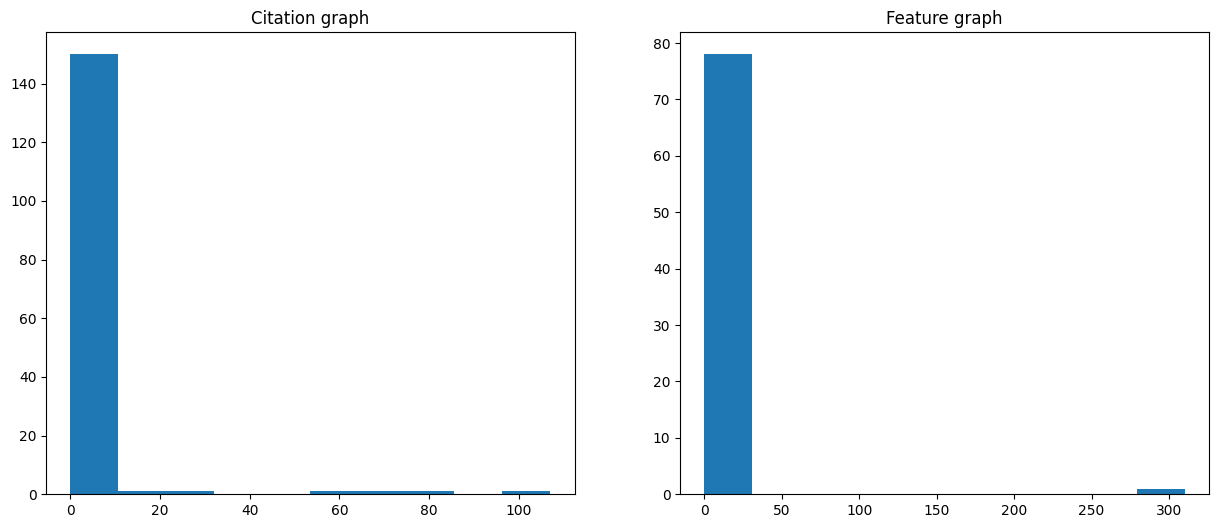

In [17]:
# Your solution here ###########################################################
citation_degrees = nx.degree_histogram(G_citation)

feature_degrees = nx.degree_histogram(G_feature)
# Note: the following plots should definitely use a logscale
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Citation graph')
axes[0].hist(citation_degrees);
axes[1].set_title('Feature graph')
axes[1].hist(feature_degrees);

**6.2 [2pt]** Explain what the degree distribution tell us about a network. Then, discuss how to make a prediction on the network model type of the citation and the feature graph by looking at their degree distributions.

**Your answer here:** One can use the degree distribution to try to guess whether it is fat-tailed or exponentially decreasing. However, using lin-lin plots is not suited to make such a distinction visually. In case the distribution follows a power-law, we expect to see an affine relationship on a log-log plot, as $p_k = Ck^{-\gamma} \Leftrightarrow \log(p_k) = - \gamma \log (k) + \log(C)$

**6.3 [1pt]** Simulate a network using the configuration model to match the degree distribution of the feature exactly. Refer to [Configuration model](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model).


In [18]:
# Your solution here ###########################################################
degrees = [deg for _, deg in G_feature.degree()]
G_config = nx.configuration_model(degrees)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print('Configuration model has {} nodes and {} edges.'.format(G_config.number_of_nodes(), G_config.size()))
print('Feature model has {} nodes and {} edges.'.format(G_feature.number_of_nodes(), G_feature.size()))

Configuration model has 418 nodes and 2364 edges.
Feature model has 418 nodes and 2364 edges.


**6.4 [2pt]** Explain if the graph generated by the configuration model is identical to the feature graph. If not, motivate how to understand if they are not the same.

In both case, verify your answer with a code.

**Your answer here:** Both graphs share the same degree distribution, so all moments will be equal. However, this is not sufficient for two graphs to be isomorphic. For example, an hexagonal graph and two disconnected triangles share the same degree distribution.

Similarly here, graphs are not isomorphic since the average shortest path distance in their largest component are different.

In [19]:
# Your solution here ###########################################################

g_config_hist = nx.degree_histogram(G_config)
g_feature_hist = nx.degree_histogram(G_feature)
print(f"Do the degree distributions match? Answer: {g_config_hist == g_feature_hist}")

giant_config = extract_largest_cc(G_config)

average_dist_config_gc = nx.average_shortest_path_length(giant_config)
average_dist_feature_gc = nx.average_shortest_path_length(giant_feature)

print(f"Average shortest path length of giant component of configuration model: {average_dist_config_gc:.2f}")
print(f"Average shortest path length of giant component of feature graph: {average_dist_feature_gc:.2f}")
print("Hence, the original networks are different.")
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Do the degree distributions match? Answer: True
Average shortest path length of giant component of configuration model: 2.02
Average shortest path length of giant component of feature graph: 1.30
Hence, the original networks are different.


**6.5 [2pt]** Which alternative model would you choose to match the degree distribution of the original network while mainitaining some structural similarities? 

**Your answer here:** The mean characteristics of graphs we investigated are degree distribution, size of the giant component, average degree and clustering coefficient. Our networks exhibit:
* Power-law degree distribution
* Super-critical regime regarding the fraction of nodes in the giant component and average degree
* Decent/high clustering coefficient (see below)

In order to maintain the degree distribution and preserve the scale-free property, we could use the hidden parameter model (lecture 4, slide 27)

### Question 7 [11pt]: Clustering Coefficient and Watts-Strogatz model

Let us check the average clustering coefficient of the original citation and feature graphs. 

In [20]:
CC_cit = nx.average_clustering(G_citation)
CC_feat = nx.average_clustering(G_feature)
print("Clustering coefficient of citation graph:", CC_cit)
print("Clustering coefficient of feature graph:", CC_feat)

Clustering coefficient of citation graph: 0.31318396750074196
Clustering coefficient of feature graph: 0.17909022944594014


Let's compare it with the ER random network model:

In [21]:
print("Clustering coefficient of ER graph", nx.average_clustering(G_er))

Clustering coefficient of ER graph 0.01551828374583791


**7.1 [2pt]** Explain what the clustering coefficient tell us about a network. Comment on how it compares to the random model.

**Your answer here:** The clustering coefficient defined as $C_i = \frac{2 L_i}{k_i (k_i - 1)}$ measures for each node, how connected its direct neighbours are. For example, the clustering coefficient of 0.3132 of the citation graph means, on average, there is a 31.32% chance that two random papers connected to a given paper (either citing or being cited by the paper) will also be connected to each other, which is significantly higher than the random ER graph and suggests the citation graph is non-random. Similar observation can be made for the feature graph.

**7.2 [2pt]** In order to model the relatively high cluster coefficient of the **citation** graph while still maintaining the "small world" feature you will now create a Watts-Strogatz (WS) graph to fit the citation graph. First, set the regularity parameter $k$ Explain your choice.

**Your answer here:** The regularity parameter $k$ determines, in a regular ring lattice (the initial structure of the Watts-Strogatz (WS) graph, each node is connected to its $k$ neighbours. In this context, as we want the WS graph to fit to the citation graph, we set $k=\langle k_{\mathrm{citation}} \rangle$ rounded to the nearest integer.

In [22]:
# Your solution here ###########################################################
k_cit = round(compute_avg_degree(G_citation))
k_cit
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

4

**7.3 [3pt]** In order to select the optimal randomness parameter $p$ of the WS model we should monitor the clustering coefficient (CC) of the model with respect to $p$. Explain what other property should be monitored. Write a code that create WS networks with values of $p$ from $0$ to $1$ and plot the values of the CC and the other parameter with respect to p.

*Note*: plot the x axis in decimal and logarithmic scale and scale the values of the properties by the value at $p=0$. Make sure to select enough points for $p$ in thr range $[0,1]$

**Your answer here:** We should also monitor the "small world" property by monitoring the average path length of the model with respect to 𝑝, as small average path length along with higher clustering coefficient indicates a "small-world" property.

**7.4 [3pt]** Compute the values of the monitored properties of the real citation graph and scale them by the corresponding values of the WS models at $p=0$. Which $p$ whould you select? Explain and generate the model with the chosen parameters. 

*Hint*: Notice the connected components of citation graph for the computaion of the other property. 

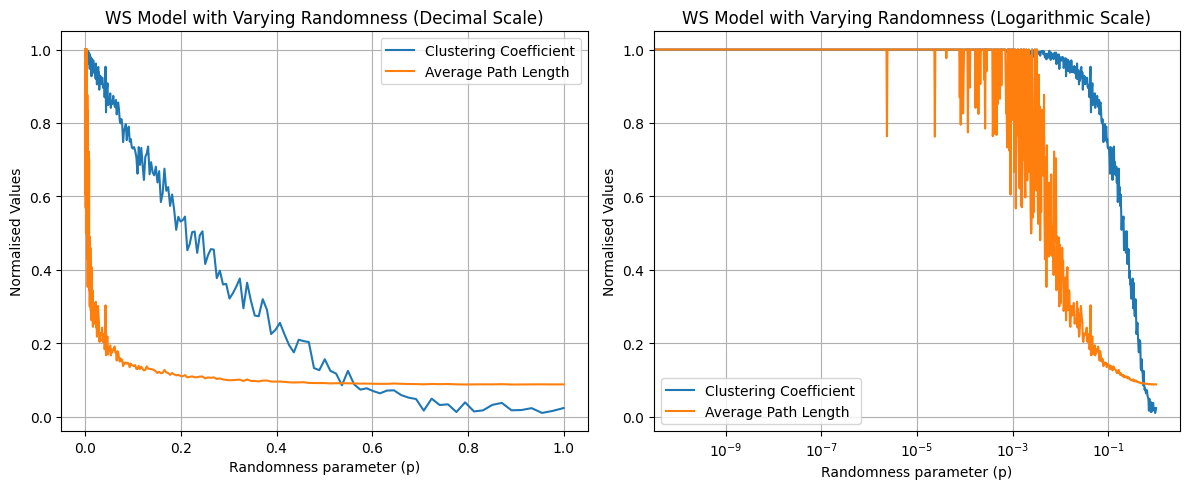

In [23]:
# Your solution here ###########################################################

p_values_log = np.logspace(-10, 0, 1000) # p values from 0 to 1 with log scale
p_values = np.concatenate(([0], p_values_log)) # concat with p = 0 

cc_values = []  # clustering coefficient values
l_values = []  # average path length values

# Generate WS networks and compute CC and L for each p value
for p in p_values:
    G = nx.watts_strogatz_graph(n, k_cit, p)
    cc = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    cc_values.append(cc)
    l_values.append(l)

# Normalise CC and L values by the value at p=0
cc_values = np.array(cc_values) / cc_values[0]
l_values = np.array(l_values) / l_values[0]

# Plot CC and L values with respect to p (decimal scale)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(p_values, cc_values, label="Clustering Coefficient")
plt.plot(p_values, l_values, label="Average Path Length")
plt.xlabel("Randomness parameter (p)")
plt.ylabel("Normalised Values")
plt.title("WS Model with Varying Randomness (Decimal Scale)")
plt.legend()
plt.grid()

# Plot CC and L values with respect to p (logarithmic scale)
plt.subplot(1, 2, 2)
plt.plot(p_values, cc_values, label="Clustering Coefficient")
plt.plot(p_values, l_values, label="Average Path Length")
plt.xscale("log")
plt.xlabel("Randomness parameter (p)")
plt.ylabel("Normalised Values")
plt.title("WS Model with Varying Randomness (Logarithmic Scale)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [24]:
# Your solution here ###########################################################

# Extract the largest connected component
largest_cc_citation = extract_largest_cc(G_citation)

# Compute CC and L for the largest connected component
cc_largest_cc_citation = nx.average_clustering(largest_cc_citation)
l_largest_cc_citation = nx.average_shortest_path_length(largest_cc_citation)

p_optimal = 10**(-1)

# Create a WS graph with p=0 (regular lattice)
n_largest_cc_citation = largest_cc_citation.number_of_nodes()
k_largest_cc_citation = round(2 * largest_cc_citation.number_of_edges() / n_largest_cc_citation)
G_ws0 = nx.watts_strogatz_graph(n_largest_cc_citation, k_largest_cc_citation, 0)

# Compute CC and L for the WS graph at p=0
cc_ws0 = nx.average_clustering(G_ws0)
l_ws0 = nx.average_shortest_path_length(G_ws0)

# Scale the largest connected component properties by the corresponding WS model properties at p=0
scaled_cc_citation = cc_largest_cc_citation / cc_ws0
scaled_l_citation = l_largest_cc_citation / l_ws0

print("Scaled Clustering Coefficient:", scaled_cc_citation)
print("Scaled Average Path Length:", scaled_l_citation)

# Generate the WS model using the chosen parameters
G_ws = nx.watts_strogatz_graph(n_largest_cc_citation, k_largest_cc_citation, p_optimal)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Scaled Clustering Coefficient: 0.6476501185585324
Scaled Average Path Length: 0.0714791438228339


**Your answer here:** The chosen 𝑝-value is $10^{-1}$. By consulting the logarithmic scale plot, we select a 𝑝-value such that $p \in (10^{-3}, 10^{-1}]$. In this interval, the clustering coefficient remains comparatively high (typical property of real networks), and the average path length declines quickly, exemplifying the "small world" property.

**7.5 [1pt]** Explain whether the Watts-Strogatz model provides a good fit for the feature graph.

*Hint*: Remember that the feature graph in this section is a pruned version. 

In [25]:
# Compute degree distribution moments 1 and 2 and compare with the feature graph:
print(f"Is WS graph connected? {nx.is_connected(G_ws)}")
print("---")
print(f"WS clustering coefficient: {nx.average_clustering(G_ws):.2f}")
print(f"Feature graph clustering coefficient: {nx.average_clustering(G_feature):.2f}")
print(f"Feature graph giant comp. clustering coefficient: {nx.average_clustering(giant_feature):.2f}")
print("---")
print(f"WS giant CC average path length: {nx.average_shortest_path_length(G_ws):.2f}")
print(f"Feature graph average path is undefined as the graph is not connected")
print(f"Feature graph giant CC average path length: {nx.average_shortest_path_length(giant_feature):.2f}")
print("---")

Is WS graph connected? True
---
WS clustering coefficient: 0.36
Feature graph clustering coefficient: 0.18
Feature graph giant comp. clustering coefficient: 0.91
---
WS giant CC average path length: 7.02
Feature graph average path is undefined as the graph is not connected
Feature graph giant CC average path length: 1.30
---


**Your answer here:** The WS graph doesn't look like a good model of the feature graph. From the degree distribution (pruned feature graph) in Question 2.7, we can see it follows a power law distribution. However, the general WS model has exponentially decaying tails. 

Empirically, the clustering coefficient of the WS is too low, and the average path length of the giant component of the feature graph is way shorter, which might be the ultra-small property of some scale-free networks (degree exponent $2 < \gamma < 3$).

### Question 8 [8pt]: Comparison to Barabási-Albert (BA) model

**8.1 [2pt]** Explain how to determine the preferential attachment parameter for Barabási–Albert graphs. Define $q$ and build the BA graph. 

**Your answer here:** The preferential attachment parameter of node $i$ is the probability that a new node added to a BA network will be connected to node $i$. It is defined as $\Pi\left(k_i\right)=\frac{k_i}{\sum_j k_j}$. 

In [26]:
# Your solution here ###########################################################
# q is the number of edges to attach to a new node.
q = round(compute_avg_degree(G_citation))
print(q)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_ba = nx.barabasi_albert_graph(n, q)

4


Check the number of edges in the Barabási–Albert graph.

In [27]:
print('My Barabási-Albert network that simulates the citation graph has {} edges.'.format(G_ba.size()))

My Barabási-Albert network that simulates the citation graph has 1656 edges.


**8.2 [2pt]** Plot the degree distribution histograms for the simulated networks (ER, BA, Configuration, WS).

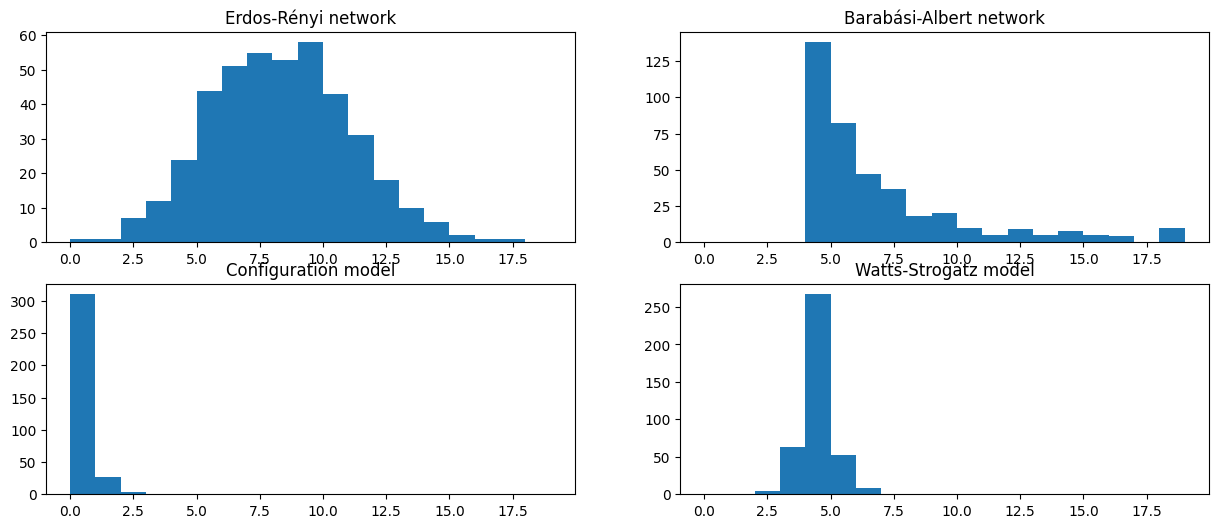

In [28]:
# Your solution here ###########################################################
er_degrees = [deg for _, deg in G_er.degree()]
ba_degrees = [deg for _, deg in G_ba.degree()]
config_degrees = [deg for _, deg in G_config.degree()]
ws_degrees = [deg for _, deg in G_ws.degree()]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(2, 2, figsize=(15, 6))

bins = np.arange(20)
axes[0,0].set_title('Erdos-Rényi network')
axes[0,0].hist(er_degrees, bins=bins)
axes[0,1].set_title('Barabási-Albert network')
axes[0,1].hist(ba_degrees, bins=bins)
axes[1,0].set_title('Configuration model')
axes[1,0].hist(config_degrees, bins=bins)
axes[1,1].set_title('Watts-Strogatz model')
axes[1,1].hist(ws_degrees, bins=bins)
plt.show()

**8.3 [2pt]** Explain, in terms of the degree distribution, whether there is a good match between the citation and feature graphs and the simulated networks.
For the citation graph, choose one of the simulated networks above that match its degree distribution best and indicate your preference below.

**Your answer here:** As seen in part A, question 2.7, the citation and feature graphs follow a power law distribution.

 Therefore, the ER and WS models are bad fits because they are too light-tailed. 
 
 The BA is better but has no density before degree 5, which is not representative of (scale-free) real networks. One solution would be to set $q = 1$ but in this case there would be as many edges as vertices, which is not representative of the real networks (they have 827 and 2364 edges with ~ 400 vertices).
 
 Finally, by construction, the configuration network fits perfectly the degree distribution of the feature network.

Now, let us check the average clustering coefficient for the simulated networks.

In [29]:
print("Erdos-Renyi clustering coefficient:", nx.average_clustering(G_er))
print("Barabasi-Albert clustering coefficient:", nx.average_clustering(G_ba))
print("Configuration model clustering coefficient:", nx.average_clustering(nx.Graph(G_config)))
print("Watts-Strogatz model clustering coefficient:", nx.average_clustering(G_ws))

Erdos-Renyi clustering coefficient: 0.01551828374583791
Barabasi-Albert clustering coefficient: 0.0626665654356172
Configuration model clustering coefficient: 0.1098284166168085
Watts-Strogatz model clustering coefficient: 0.3614587100663048


**8.4 [2pt]** Comment on the values you obtain for the simulated networks. Motivate if there is any good match to the citation or feature graph in terms of clustering coefficient.

**Your answer here:**
* Citation graph clustering coefficient: 0.3132
* Feature graph clustering coefficient: 0.1790

As we can see the ER and BA networks are bad fits with regard to the clustering coefficient. The WS model is closest to the citation one and the configuration model to the feature graph, however the fit is far from perfect.

### Question 9 [13pt]: Network generating process

In this question we will design a network formation model for the directed citation graph, considering it as a growth process.

**9.1 [3pt]** Supposing that authors know all papers in their field at any time, how can we model their choice to cite each of them?

**Your answer here:** 

A particularly relevant model to generate such network is the *Copying model*. When publishing papers, researchers will usually reuse citations found in the litterature review of other relevant papers. The copying model simulates this effect by having new nodes copy edges from existing ones when added to the network.

Assuming papers only cite other papers in the same research field, here's how we model their choices (hyperparameters are $m_0, m, \sigma, p$):

1. Begin with an network with $m_0$ nodes and $m_0$ arbitrary links.
2. Add a new node: for each new paper (node) added to the network, it connects to $k \sim \mathcal{N}(m, \sigma)$ existing papers (nodes).
3. New edges: pick a random existing node $u$ and:
    * With probability $p$, cite the target paper $u$.
    * With probability $1-p$, copy a citation from $u$, meaning that the new paper will cite one $u$'s neighbours. Note that if the target node $u$ has no neighbours and we intended to copy one of its citation, we resample a different $u$ and carry on.
5. Repeat: Continue adding new nodes (papers) and directed edges (citations) following steps 2-4 until the desired network size is reached.

Finally, we tune the model hyperparameters so that the important properties of the simulated network match the ones of real ones (power-law shape, clustering coefficient, giant component size).

**9.2 [5pt]** Define a function that takes as input the number of nodes $n$ and any other parameter you identified. This function iteratively grows a graph on $n$ nodes based on the formation model that you described in 9.1. You can add all additional arguments that you need.

In [30]:
# Your solution here ###########################################################
def my_formation_model(n_nodes: int, m0: int, m: int, p: float, num_edges_std: float):

    # Step 1: Create initial network - average in-degree & out-degree = m
    initial_network = nx.gnm_random_graph(m0, m0, directed=True)

     # Step 2: Add new nodes
    for new_node in range(m0, n_nodes):

        # Initialise the set of nodes to which the new node will be connected
        connected_nodes = set()
        
        num_edges = np.random.normal(m, num_edges_std, size=1)
        num_edges = max(0, int(num_edges))

        # Step 3: Select target paper
        for _ in range(num_edges):
            target_node = np.random.choice(initial_network.nodes())

            # Ensure that the new node does not connect to itself or duplicate an edge
            while target_node == new_node or (new_node, target_node) in initial_network.edges():
                target_node = np.random.choice(initial_network.nodes())

            # Step 4: Copy or random citation
            if np.random.rand() <= p:
                # Random citation
                target_node = target_node
            else:
                # Copy citation
                target_neighbours = list(initial_network.neighbors(target_node))
                # If the picked node has no neighbours, pick a new node
                while not target_neighbours:
                    target_node = np.random.choice(initial_network.nodes())
                    target_neighbours = list(initial_network.neighbors(target_node))
                
                target_node = np.random.choice(target_neighbours)

            connected_nodes.add(target_node)

        # Add the new node and its edges to the network
        initial_network.add_node(new_node)
        initial_network.add_edges_from([(new_node, target) for target in connected_nodes])

    return initial_network


def eval_formation_model_statistics(
        n_nodes: int, 
        m0: int,
        m: int,
        p: float,
        num_edges_std: float,
        n_experiments=100: int,
        shortest_path=False: bool,
    ):
    """
    Evaluate the statistics of the custom formation model over n_experiments for more accurate results.
    """
    models = [my_formation_model(n_nodes, m0, m, p, num_edges_std) for _ in range(n_experiments)]
    models = [models.to_undirected() for models in models]

    avg_num_edges = np.mean([model.number_of_edges() for model in models])
    std_num_edges = np.std([model.number_of_edges() for model in models])

    gcs = [extract_largest_cc(model) for model in models]

    avg_gcs_num_nodes = np.mean([gc.number_of_nodes() for gc in gcs])
    std_gcs_num_nodes = np.std([gc.number_of_nodes() for gc in gcs])

    avg_gcs_num_edges = np.mean([gc.number_of_edges() for gc in gcs])
    std_gcs_num_edges = np.std([gc.number_of_edges() for gc in gcs])

    avg_clustering_coeff = np.mean([nx.average_clustering(model) for model in models])
    std_clustering_coeff = np.std([nx.average_clustering(model) for model in models])

    print(f"Num. of edges: {avg_num_edges:.2f} +/- {std_num_edges:.2f}")
    print(f"Giant component size (number of nodes): {avg_gcs_num_nodes:.2f} +/- {std_gcs_num_nodes:.2f}")
    print(f"Giant component size (number of edges): {avg_gcs_num_edges:.2f} +/- {std_gcs_num_edges:.2f}")
    print(f"Average clustering coefficient: {avg_clustering_coeff:.2f} +/- {std_clustering_coeff:.2f}")
    if shortest_path:
        avg_shortest_path_length = np.mean([nx.average_shortest_path_length(model) for model in gcs])
        std_shortest_path_length = np.std([nx.average_shortest_path_length(model) for model in gcs])
        print(f"Average shortest path length in giant component: {avg_shortest_path_length:.2f} +/- {std_shortest_path_length:.2f}")


m0 = 5 # initial number of nodes
m = 3 # number of edges to attach to a new node
p = 0.13 # p_test # probability of a random citation
num_edges_std = 1.1
 
A_mymodel = my_formation_model(A_citation.shape[0], m0, m, p, num_edges_std)
eval_formation_model_statistics(A_citation.shape[0], m0, m, p, num_edges_std)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Num. of edges: 915.05 +/- 34.21
Giant component size (number of nodes): 406.98 +/- 3.70
Giant component size (number of edges): 915.03 +/- 34.20
Average clustering coefficient: 0.32 +/- 0.06


**9.3 [1pt]** Check wether your graph is directed. If it is, make it undirected.

In [31]:
# Your solution here ###########################################################

if A_mymodel.is_directed():
    print("The graph is directed.")
    
    # Convert the directed graph to an undirected graph
    A_mymodel = A_mymodel.to_undirected()
    print("The graph has been converted to an undirected graph.")
else:
    print("The graph is already undirected.")
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

The graph is directed.
The graph has been converted to an undirected graph.


**9.4 [2pt]** Compare the degree distributions of the citation graph and yours, then tune the paramters of your model to have a similar distribution.

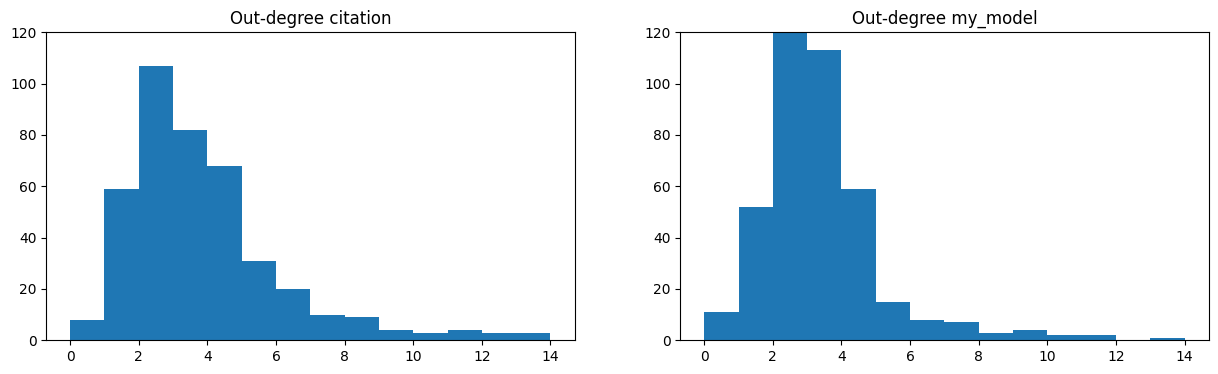

In [32]:
# Your solution here ###########################################################
degrees_citation = [deg for _, deg in G_citation.degree()]
degrees_mymodel = [deg for _, deg in A_mymodel.degree()]
y_max = 120
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Note: we aligned the y axis limits so that they on the same scale, hence easier to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set(title="Out-degree citation")
ax[0].hist(degrees_citation, bins=np.arange(15), range=(0, y_max))
ax[0].set_ylim(0, y_max)

ax[1].set(title="Out-degree my_model")
ax[1].hist(degrees_mymodel, bins=np.arange(15))
ax[1].set_ylim(0, y_max)

plt.show()

**9.5 [2pt]** Compute and print the following metrics:
- Number of edges
- Giant component size and number of edges
- Clustering coefficient

In [33]:
print("Number of edges:", G_citation.number_of_edges())
print("Giant component size (number of nodes):", extract_largest_cc(G_citation).number_of_nodes())
print("Giant component size (number of edges):", extract_largest_cc(G_citation).number_of_edges())
print("Average clustering coefficient:", nx.average_clustering(G_citation))

Number of edges: 827
Giant component size (number of nodes): 395
Giant component size (number of edges): 818
Average clustering coefficient: 0.31318396750074196


In [34]:
# Your solution here ###########################################################

# Compute the number of edges
print("Number of edges:", A_mymodel.number_of_edges())

# Compute the giant component size and number of edges
print("Giant component size (number of nodes):", extract_largest_cc(A_mymodel).number_of_nodes())
print("Giant component size (number of edges):", extract_largest_cc(A_mymodel).number_of_edges())

# Compute the clustering coefficient
print("Average clustering coefficient:", nx.average_clustering(A_mymodel))

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Number of edges: 949
Giant component size (number of nodes): 407
Giant component size (number of edges): 949
Average clustering coefficient: 0.3305790084680956


### Question 10 [4pt]: Putting it all together

It is time to identify the best models for our graphs.

**10.1 [4pt]** Compare the metrics computed across all models and discuss which models provide the best fit to our two graphs and which are their shortcomings. Note that the best model could be different for the citation and feture graphs.

**Your answer here:** To call a model a best fit for a real-world graph, one can compute various similarity measures. The most relevant seen so far are:
* The degree distribution shape: exponentially decaying or heavy-tailed and visual similarity.
* The average clustering coefficient: higher for real-world graphs than random ones.
* Giant component: fraction of nodes inside / degree distribution.
* The average distance between nodes of the graph (giant component if the graph is not connected), measure of the small-world / ultra small property.

We already discussed some shortcoming earlier but we restate our main point here: 
* (From 1a + 1b Q 6.1) Degree distribution of both graphs look heavy-tailed.
* Average clustering coefficient: WS closest to citation graph, configuration model to feature graph, but fit is far from perfect.
* We looked at the GC degree distribution with an ER model, but as expected, the fit was bad as we expect the real network to be closer to a scale-free network than a random one.
* The feature graph has smaller average shortest path length than WS with our parameters.

To conclude, we think we found a formation model that can fit the citation graph pretty well. One thing that could be improved a bit is the average shortest path length, which is a bit higher

However, it looks not suited for the feature graph. Our model cannot generate graphs whose giant component contains a very high number of edges but where most nodes have low degree (something like a very big hub that connects almost everyone). Indeed, we control the number of edges added at each step through the mean parameter $m$ only, hence the degree distribution and the number of edges are tightly coupled.

We found that the configuration model is most suited even though the statistics are not perfect. We still think that the citation graph has a power-law degree distribution, but using a BA graph is not suited because:
* Degree exponent: the degree distribution of the BA model has degree exponent $3$ (see networks science by Barabasi, section 5.5, equation 5.10), which looks not sufficient for the citation graph. As the decay look faster, we expect a power law with a larger degree exponent.
* When picking $m$ (number of edges added at each step during formation), we cannot add nodes with lower degree, which is problematic here since most nodes have low degree. We found it difficult to create hubs with humongous degree while having most nodes with degree close to zero using the BA model

Those two shortcomings comfort us in choosing the configuration model for the citation graph.

In [35]:
def summarize_graph(graph, degree_y_max=120):
    if graph.is_directed():
        graph = graph.to_undirected()
    degrees = [deg for _, deg in graph.degree()]
    num_edges = graph.number_of_edges()
    gc = extract_largest_cc(graph)
    num_nodes_gc = gc.number_of_nodes()
    num_edges_gc = gc.number_of_edges()
    avg_clustering_coeff = nx.average_clustering(graph)
    average_shortest_path_length = nx.average_shortest_path_length(gc)

    fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))

    ax.set(title="Out-degree")
    ax.hist(degrees, bins=np.arange(15), range=(0, degree_y_max))
    ax.set_ylim(0, degree_y_max)
    plt.show()

    print("Number of edges:", num_edges)
    print("Giant component size (number of nodes):", num_nodes_gc)
    print("Giant component size (number of edges):", num_edges_gc)
    print("Average clustering coefficient:", avg_clustering_coeff)
    print("Average shortest path length in giant component:", average_shortest_path_length)    

## CONFIGURATION MODEL STATISTICS ##


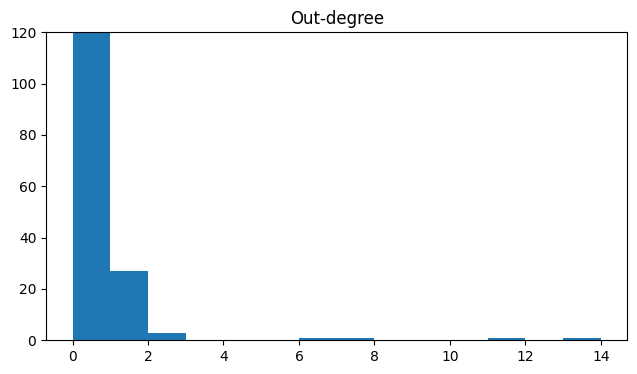

Number of edges: 1583
Giant component size (number of nodes): 108
Giant component size (number of edges): 1583
Average clustering coefficient: 0.10885104272623403
Average shortest path length in giant component: 2.0178262374524056


In [36]:
feature_mymodel = nx.configuration_model([deg for _, deg in G_feature.degree()])
feature_mymodel = nx.Graph(feature_mymodel)  # Transform the multigraph to a simple graph
print("## CONFIGURATION MODEL STATISTICS ##")
summarize_graph(feature_mymodel)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


## FEATURE GRAPH STATISTICS ##


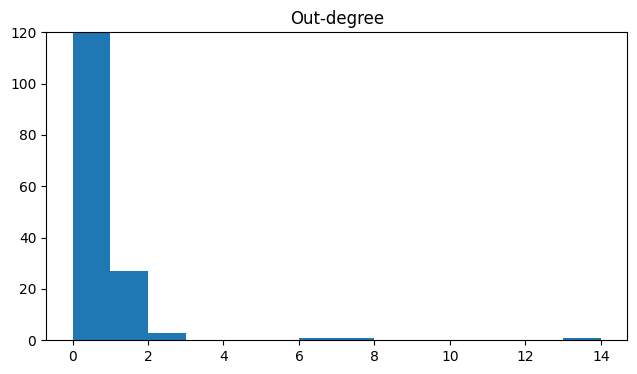

Number of edges: 2364
Giant component size (number of nodes): 82
Giant component size (number of edges): 2351
Average clustering coefficient: 0.17909022944594014
Average shortest path length in giant component: 1.302318578741343


In [37]:
print("## FEATURE GRAPH STATISTICS ##")
summarize_graph(G_feature)

## CITATION GRAPH STATISTICS ##


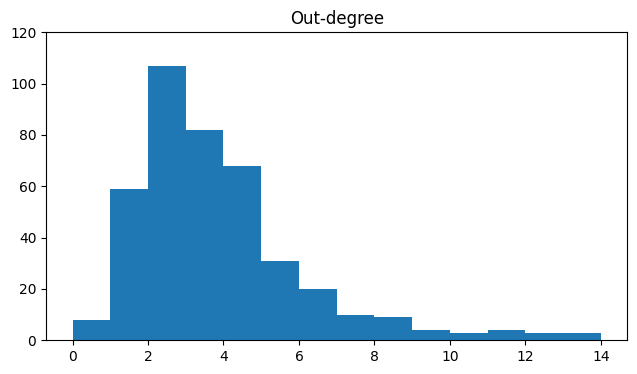

Number of edges: 827
Giant component size (number of nodes): 395
Giant component size (number of edges): 818
Average clustering coefficient: 0.31318396750074196
Average shortest path length in giant component: 3.556178114759365


In [38]:
print("## CITATION GRAPH STATISTICS ##")
summarize_graph(G_citation)

## CUSTOM CITATION MODEL STATISTICS ##


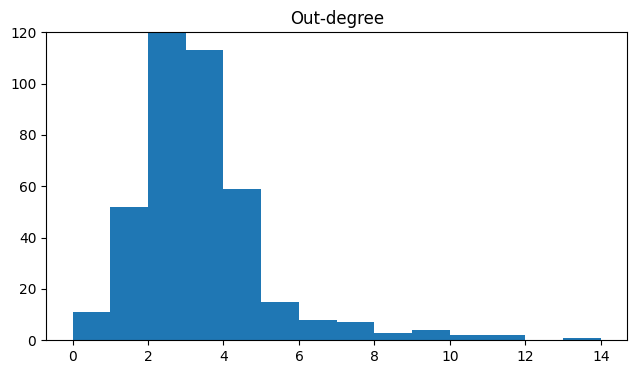

Number of edges: 949
Giant component size (number of nodes): 407
Giant component size (number of edges): 949
Average clustering coefficient: 0.3305790084680956
Average shortest path length in giant component: 2.500441776303845


In [39]:
print("## CUSTOM CITATION MODEL STATISTICS ##")
summarize_graph(A_mymodel)